### 项目介绍

银行在市场经济中发挥着至关重要的作用。他们决定谁可以获得融资，以什么条件获得融资，以及可以做出或破坏投资决策。为了使市场和社会发挥作用，个人和公司需要获得信贷。信用评分算法对违约概率进行猜测，是银行用来确定是否应授予贷款的方法。项目给出多个用户在未来两年内遇到财务相关数据。

### 字段名称描述
* **SeriousDlqin2yrs**	
逾期90天或更严重的人 - 未来两年可能违约 	Y/N

* **RevolvingUtilizationOfUnsecuredLines**	
信用卡和个人信用额度（不动产和汽车贷款等分期付款债务除外）的总余额除以信用额度之和 - 可用信贷额度比例  percentage

* **age**	 
借款人年龄（年） - 年龄	integer

* **NumberOfTime30-59DaysPastDueNotWorse**	
借款人逾期30-59天的次数，但在过去两年内没有更糟的情况。 - 逾期30-59天的笔数	integer

* **DebtRatio**	 
月债务、赡养费、生活费除以月总收入 - 负债率	percentage

* **MonthlyIncome**	 
月收入 - 月收入	real

* **NumberOfOpenCreditLinesAndLoans**	 
未偿贷款数量（分期付款，如汽车贷款或抵押贷款）和信贷额度（如信用卡） - 信贷数量	integer

* **NumberOfTimes90DaysLate**	 
借款人逾期90天或以上的次数。 - 逾期90天+的笔数	integer

* **NumberRealEstateLoansOrLines**	 
包括房屋净值信贷额度在内的抵押贷款和房地产贷款数量 - 固定资产贷款数	integer

* **NumberOfTime60-89DaysPastDueNotWorse**	 
借款人逾期60-89天的次数，但在过去两年内没有更糟的情况。 - 逾期60-89天的笔数	integer

* **NumberOfDependents** 
家庭中不包括自己的受抚养人数量（配偶、子女等） - 家属数量	integer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei']   # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False     # 用来正常显示负号
matplotlib.rc("font",family='Heiti TC')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer

import warnings
warnings.filterwarnings('ignore')

### 数据初探

In [2]:
train = pd.read_csv('./input/cs-training.csv')
train = train.drop('Unnamed: 0',axis=1)
# 为方便查看调整列名为中文
train.rename(columns = {'SeriousDlqin2yrs':'未来两年可能违约', 'RevolvingUtilizationOfUnsecuredLines':'可用信贷额度比例', 'age':'年龄',
       'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天的笔数', 'DebtRatio':'负债率', 'MonthlyIncome':'月收入',
       'NumberOfOpenCreditLinesAndLoans':'信贷数量', 'NumberOfTimes90DaysLate':'逾期90天+的笔数',
       'NumberRealEstateLoansOrLines':'固定资产贷款数', 'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天的笔数',
       'NumberOfDependents':'家属数量'},inplace=True)

In [3]:
test = pd.read_csv('./input/cs-test.csv')
test = test.drop('Unnamed: 0',axis=1)
# 为方便查看调整列名为中文
test.rename(columns = {'SeriousDlqin2yrs':'未来两年可能违约', 'RevolvingUtilizationOfUnsecuredLines':'可用信贷额度比例', 'age':'年龄',
       'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天的笔数', 'DebtRatio':'负债率', 'MonthlyIncome':'月收入',
       'NumberOfOpenCreditLinesAndLoans':'信贷数量', 'NumberOfTimes90DaysLate':'逾期90天+的笔数',
       'NumberRealEstateLoansOrLines':'固定资产贷款数', 'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天的笔数',
       'NumberOfDependents':'家属数量'},inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   未来两年可能违约     150000 non-null  int64  
 1   可用信贷额度比例     150000 non-null  float64
 2   年龄           150000 non-null  int64  
 3   逾期30-59天的笔数  150000 non-null  int64  
 4   负债率          150000 non-null  float64
 5   月收入          120269 non-null  float64
 6   信贷数量         150000 non-null  int64  
 7   逾期90天+的笔数    150000 non-null  int64  
 8   固定资产贷款数      150000 non-null  int64  
 9   逾期60-89天的笔数  150000 non-null  int64  
 10  家属数量         146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [5]:
train.head()

,未来两年可能违约,可用信贷额度比例,年龄,逾期30-59天的笔数,负债率,月收入,信贷数量,逾期90天+的笔数,固定资产贷款数,逾期60-89天的笔数,家属数量
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
# 类别分布很不平衡，会影响建模效果
print(train.未来两年可能违约.value_counts())
 
# 观察缺失值数,月收入 缺失29731，家属数量 缺失3924
train.isnull().sum()

0    139974
1     10026
Name: 未来两年可能违约, dtype: int64


未来两年可能违约           0
可用信贷额度比例           0
年龄                 0
逾期30-59天的笔数        0
负债率                0
月收入            29731
信贷数量               0
逾期90天+的笔数          0
固定资产贷款数            0
逾期60-89天的笔数        0
家属数量            3924
dtype: int64

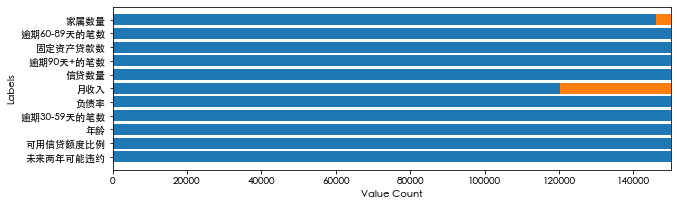

In [7]:
cols = train.columns
nullcounts = []
value_counts = []
for col in cols:
    nullcounts.append(train[col].isnull().sum())
    value_counts.append(train[col].shape[0] - train[col].isnull().sum())

fig, ax = plt.subplots(figsize=(10,3))
ax.barh(cols, value_counts, label='not missing')
ax.barh(cols, nullcounts, label='missing', left=value_counts)
ax.set_xlabel('Value Count')
ax.set_ylabel('Labels')
plt.show()

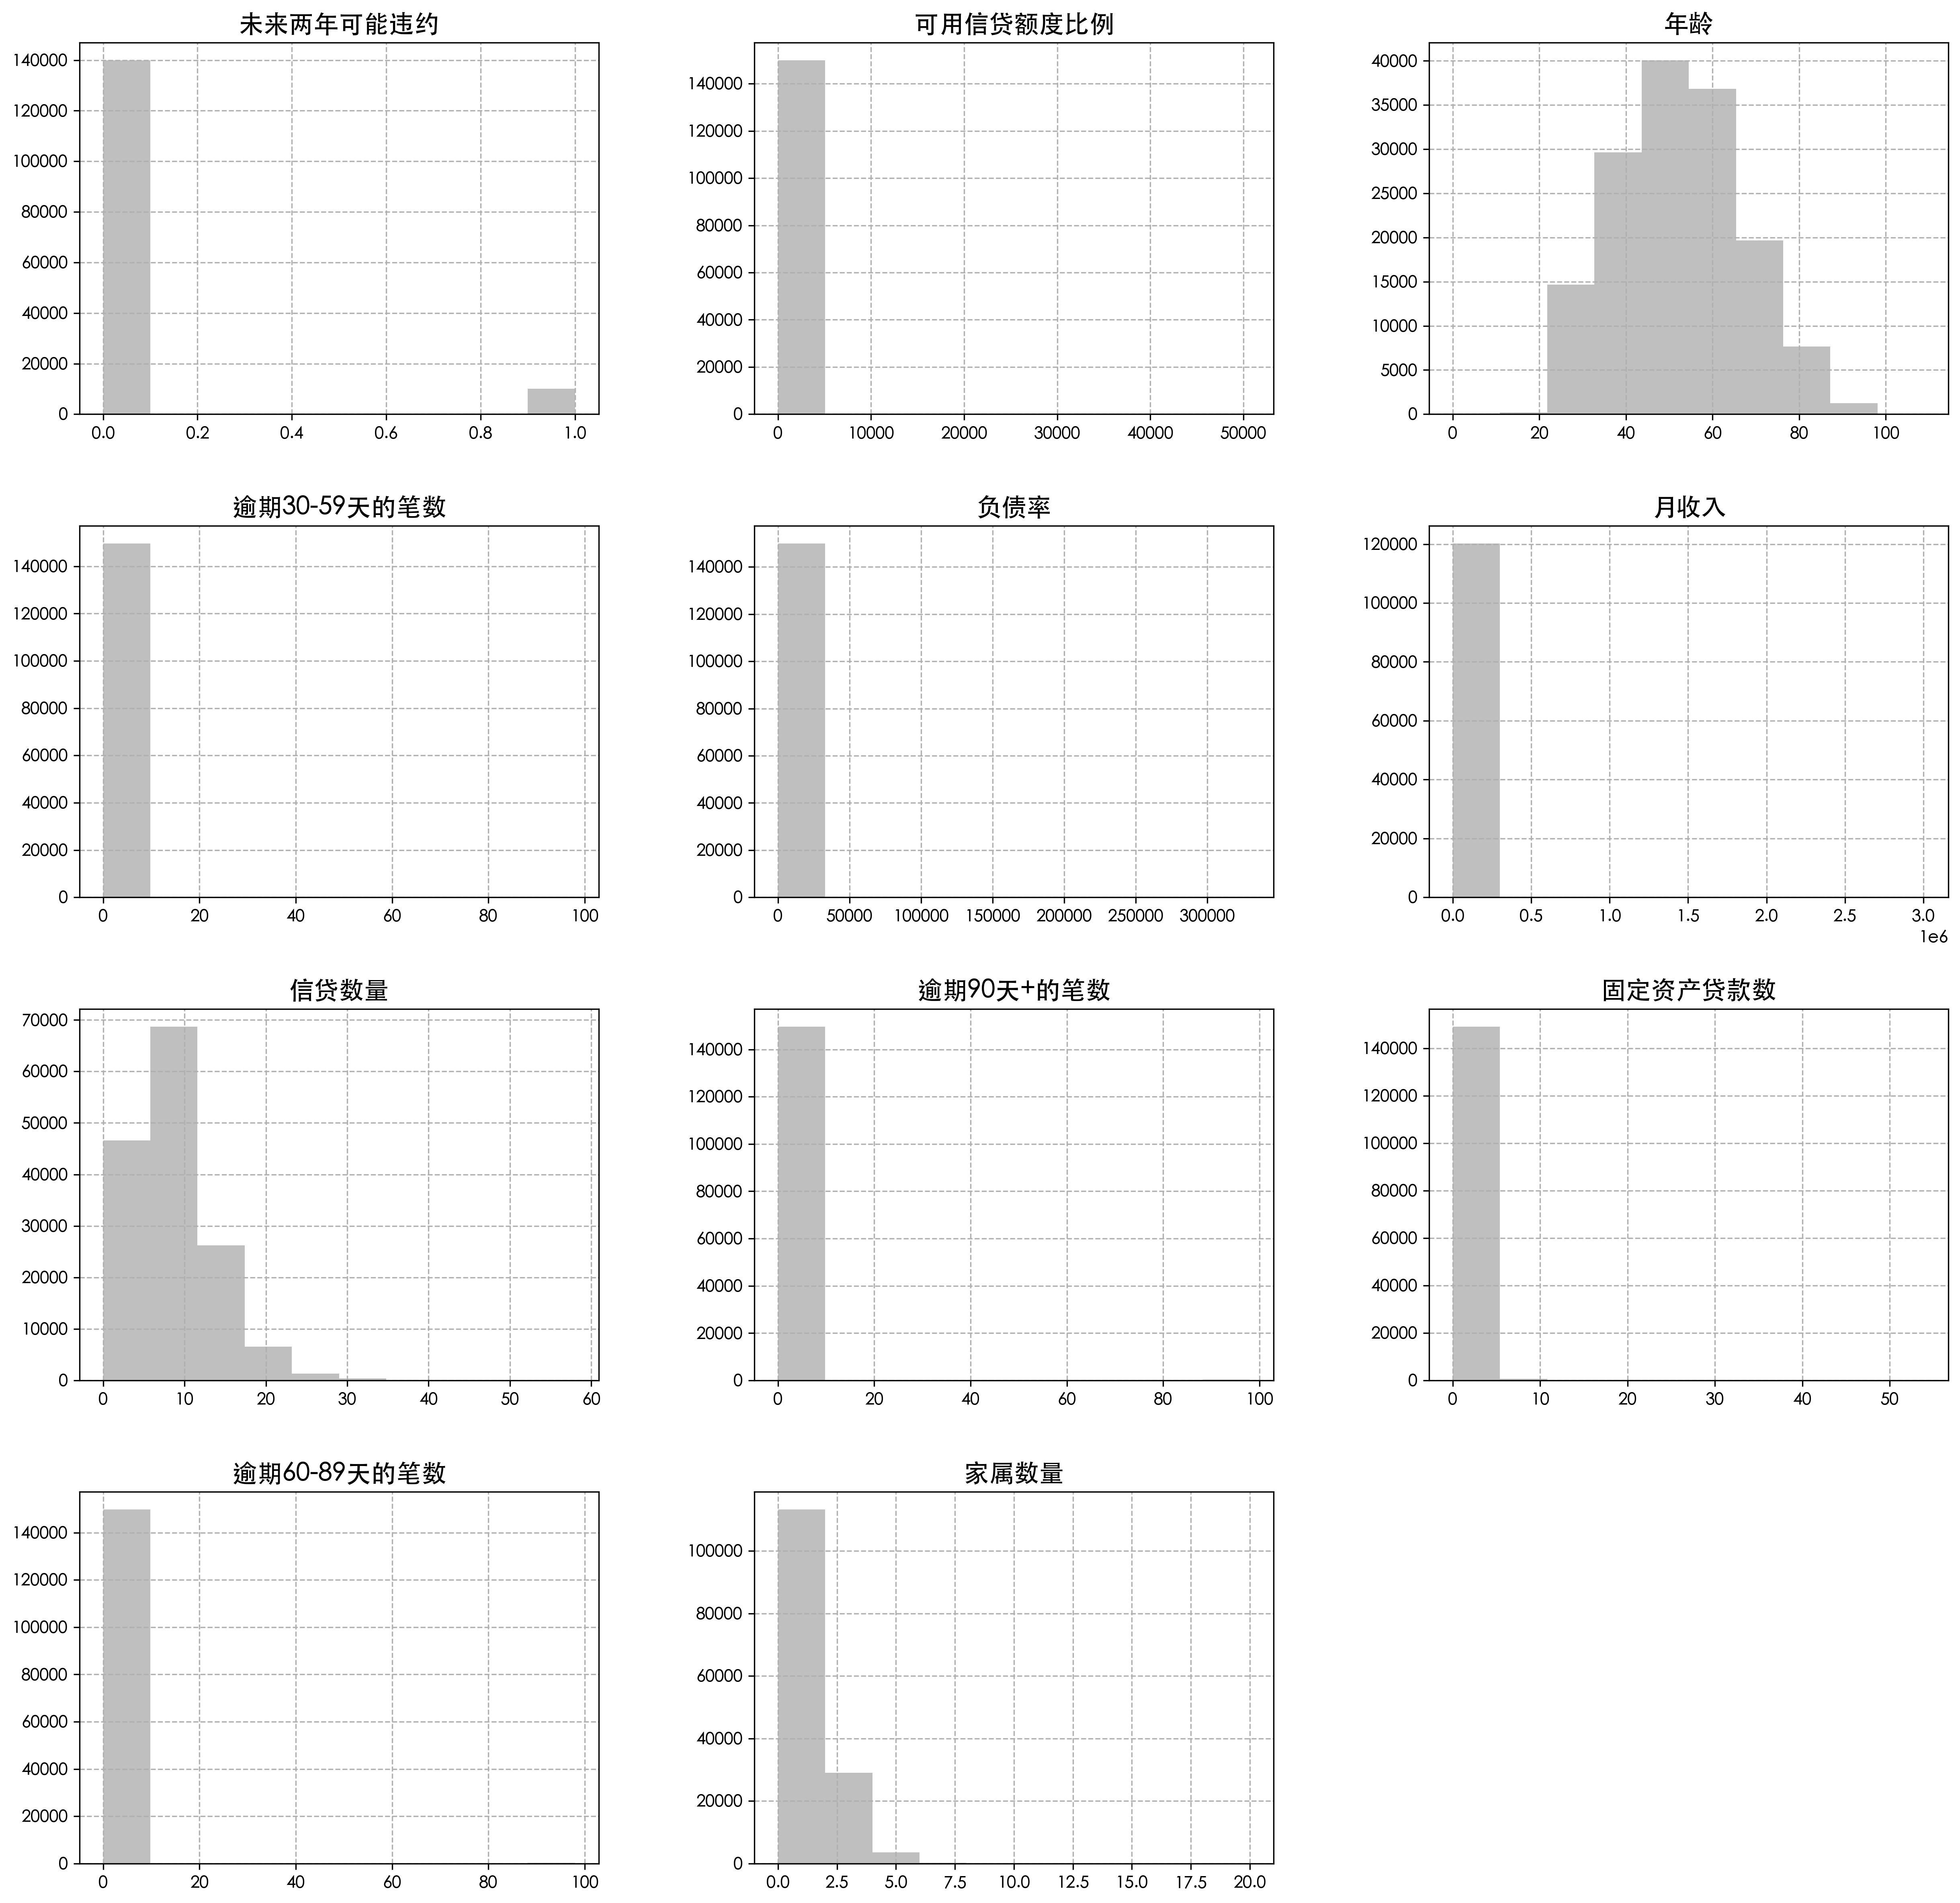

In [8]:
# 输出各字段分布情况图
# 大多数字段明显偏态，后续建模需考虑纠偏处理
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(train.columns):
    plt.subplot(4,3,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    train[i].hist(color='grey',alpha=0.5)

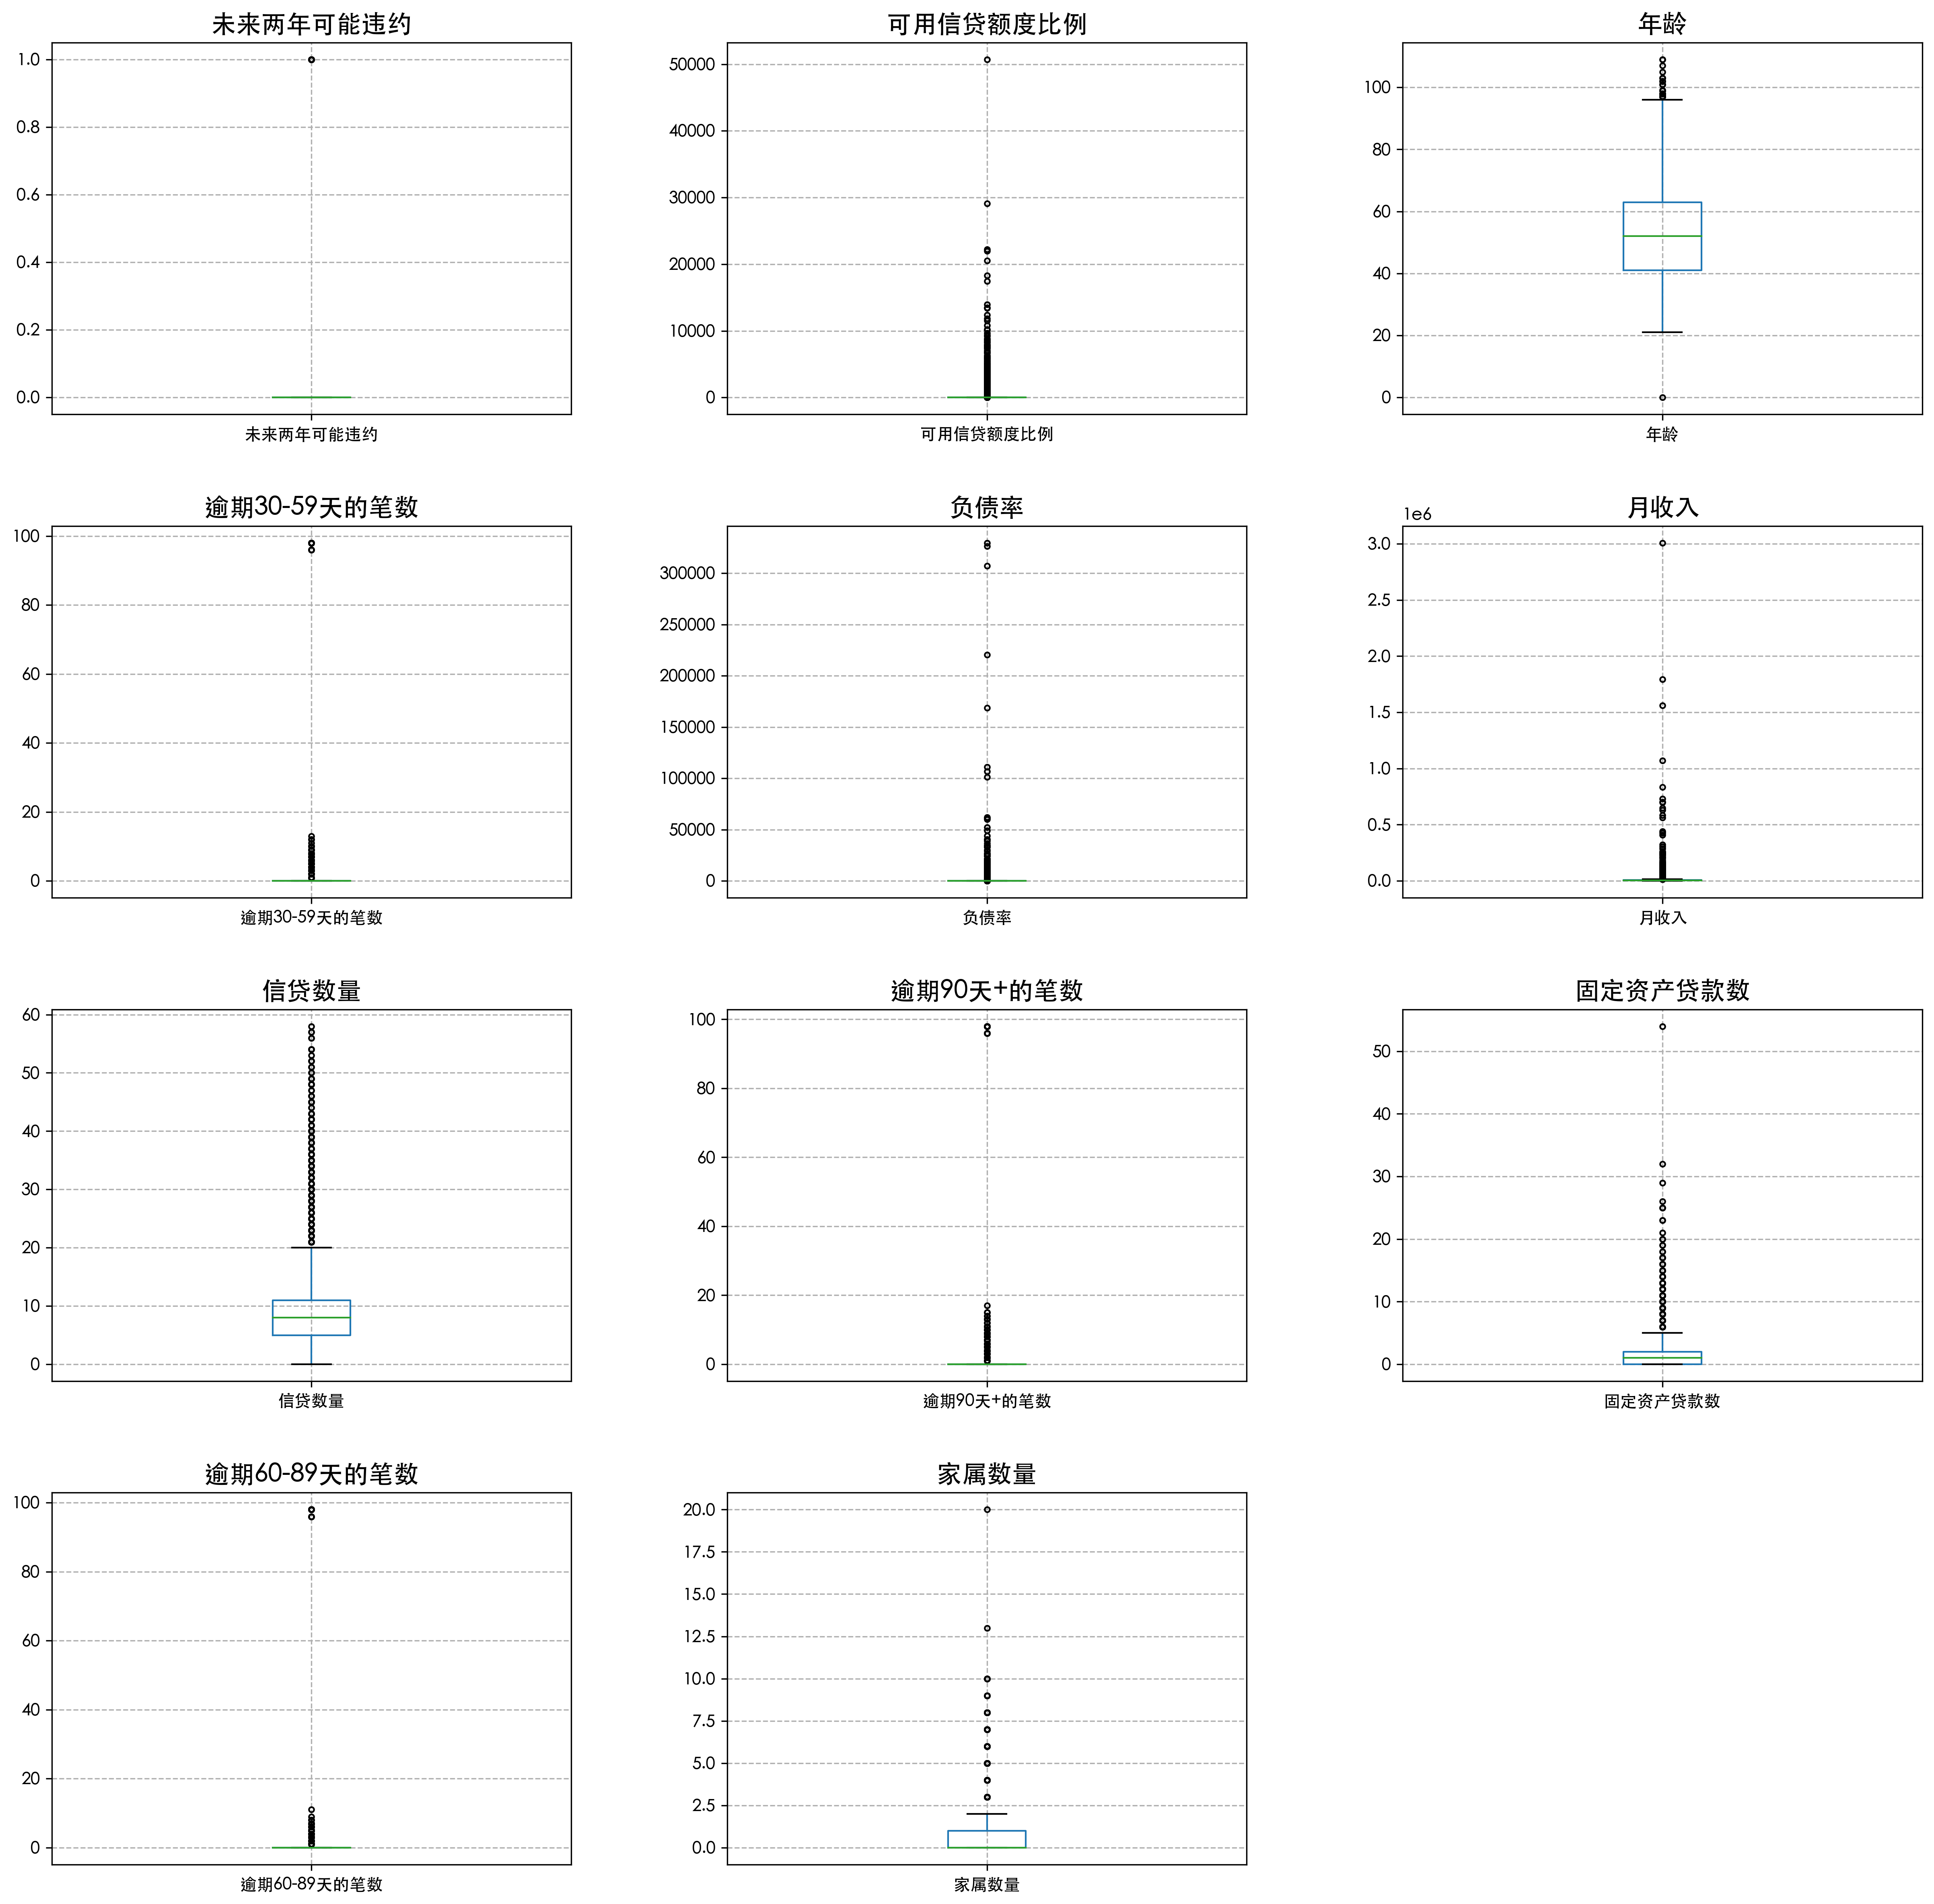

In [9]:
# 通过箱型图观察各字段异常情况
# 负债率异常值（错误）较多；可用信贷额度比例 异常值（错误）较多，理论应小于或等于1
#  '逾期30-59天的笔数', '负债率', '月收入','逾期90天+的笔数', '固定资产贷款数', '逾期60-89天的笔数'异常值非常多，难以观察数据分布。
# 年龄方面异常值有待观察
plt.figure(figsize=(20,20),dpi=300)
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for n,i in enumerate(train.columns):
    plt.subplot(4,3,n+1)
    plt.title(i,fontsize=15)
    plt.grid(linestyle='--')
    train[[i]].boxplot(sym='.')

### 相关性分析

<AxesSubplot:>

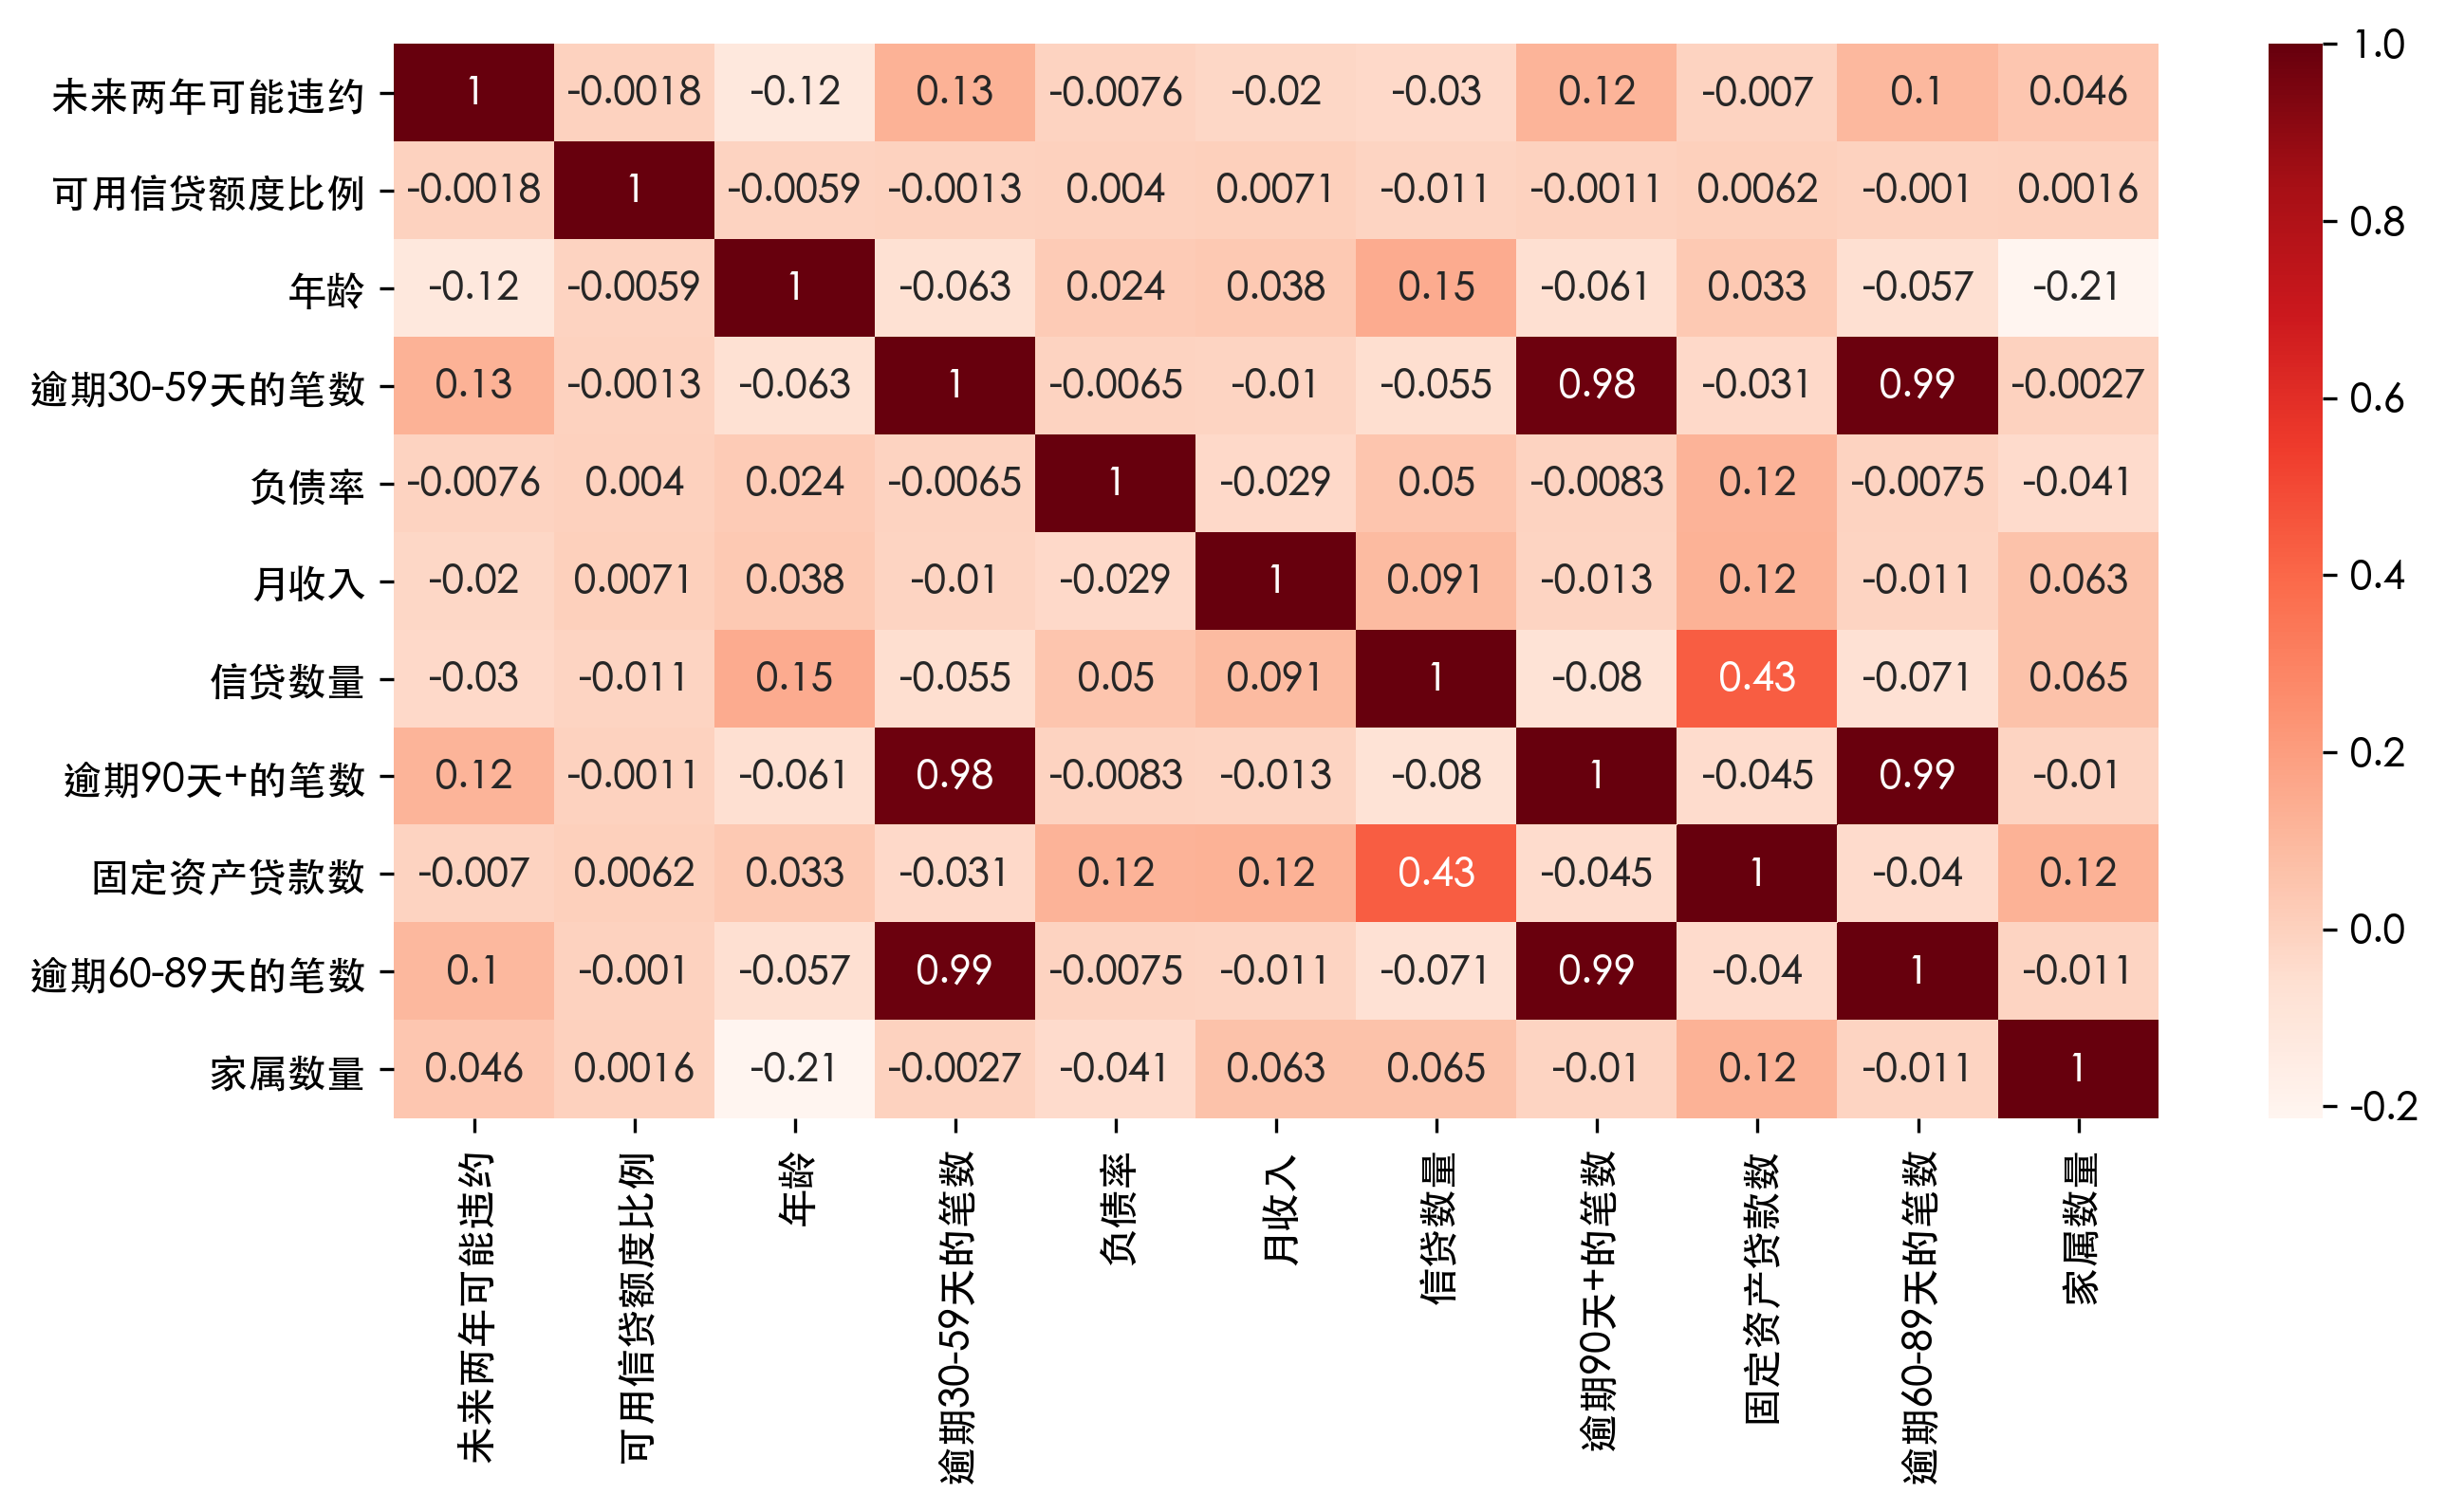

In [10]:
# 由图可知，逾期笔数这三个字段，共线性极高，可考虑去除共线性
plt.figure(figsize=(10,5),dpi=300)
sns.heatmap(train.corr(),cmap='Reds',annot=True)

### 细致分析

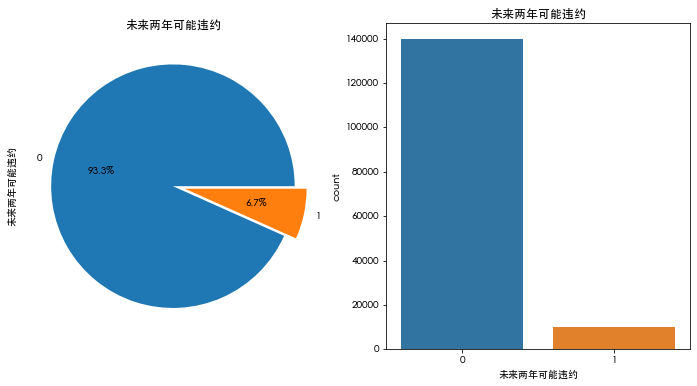

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
train['未来两年可能违约'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('未来两年可能违约')
sns.countplot('未来两年可能违约',data=train,ax=axes[1])
axes[1].set_title('未来两年可能违约')
plt.show()

<AxesSubplot:xlabel='年龄', ylabel='Density'>

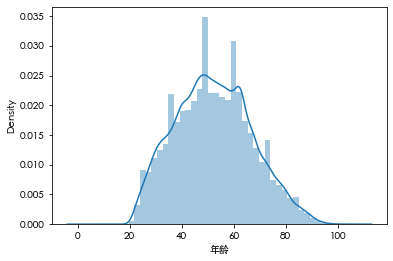

In [12]:
sns.distplot(train["年龄"])

In [13]:
train.rename(columns = {'SeriousDlqin2yrs':'未来两年可能违约', 'RevolvingUtilizationOfUnsecuredLines':'可用信贷额度比例', 'age':'年龄',
       'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天的笔数', 'DebtRatio':'负债率', 'MonthlyIncome':'月收入',
       'NumberOfOpenCreditLinesAndLoans':'信贷数量', 'NumberOfTimes90DaysLate':'逾期90天+的笔数',
       'NumberRealEstateLoansOrLines':'固定资产贷款数', 'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天的笔数',
       'NumberOfDependents':'家属数量'},inplace=True)

<AxesSubplot:xlabel='年龄', ylabel='Density'>

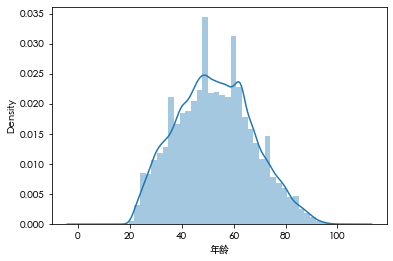

In [14]:
sns.distplot(train.loc[train["未来两年可能违约"] == 0]["年龄"])

<AxesSubplot:xlabel='年龄', ylabel='Density'>

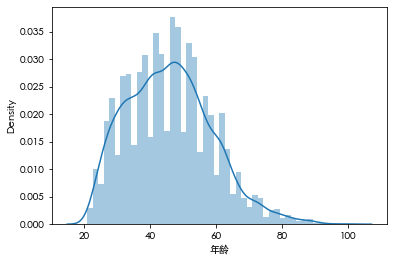

In [15]:
sns.distplot(train.loc[train["未来两年可能违约"] == 1]["年龄"])

- 可以看到“未来两年可能违约”为0的用户年龄分布 与 为1的用户年龄分布存在明显差异

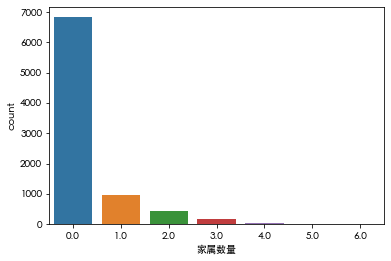

In [16]:
sns.countplot(x='家属数量',data=train[(train['年龄']>=20)&(train['年龄']<30)]);

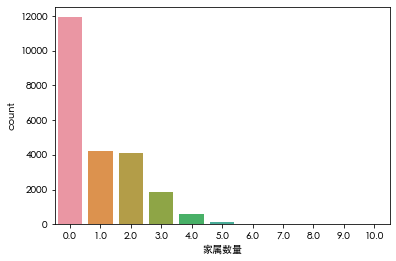

In [17]:
sns.countplot(x='家属数量',data=train[(train['年龄']>=30)&(train['年龄']<40)]);

### 数据分布分析

In [18]:
from sklearn.feature_selection import mutual_info_classif
def plot_distributions_discrete(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(train[feature], kde=True, label='Train',stat='density',
                 discrete=True, color='steelblue', alpha=0.6, ax=axes[0])
    sns.histplot(test[feature], kde=True, label='Test',stat='density',
                 discrete=True, color='gold', alpha=0.25, ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distr Train set vs Distr Test set')

    sns.boxplot(x='未来两年可能违约', y=feature, data=train, ax=axes[1], palette=['seagreen', 'tan'])
    
    X = train[[feature]].dropna()
    MI = mutual_info_classif(X, train.loc[X.index, '未来两年可能违约'], discrete_features=True,
                             random_state=0)
    axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))

    plt.suptitle('"{}" 分布'.format(feature), y=1.15);

def plot_distributions_continuous(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.kdeplot(train[feature].apply(np.log1p), label='Train',
                color='steelblue', alpha=0.5, shade=True, edgecolor='k', ax=axes[0])
    sns.kdeplot(test[feature].apply(np.log1p), label='Test',
                color='gold', alpha=0.3, shade=True, edgecolor='k', ax=axes[0])

    axes[0].legend()
    axes[0].set_title('Distr Train set vs Distr Test set')
    axes[0].set_xlabel('log-{}'.format(feature))

    sns.boxplot(x='未来两年可能违约', y=train[feature],
                data=train, ax=axes[1], palette=['seagreen', 'tan'])

    X = train[[feature]].dropna()
    MI = mutual_info_classif(X, train.loc[X.index, '未来两年可能违约'], random_state=0)
    axes[1].set_title('Distribution depending on the SeriousDlqin2yrs\n-> MI Score : ' + str(round(MI[0], 7)))
    
    plt.suptitle('"{}" 分布'.format(feature), y=1.15);

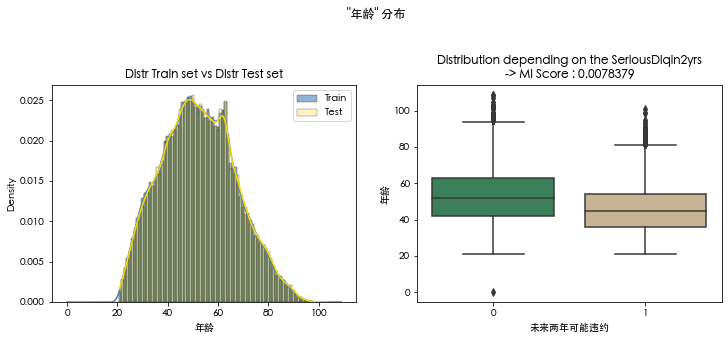

In [19]:
plot_distributions_discrete('年龄')

从图中可以发现
- 训练集和测试集的年龄分布基本类似（蓝色是训练集，黄色是测试集，在图上叠加起来显示绿色）
- 有严重违约情况的人群年龄整体偏低
- 年龄整体符合正态分布

处理age，根据法律，20岁以上才可以办理信用卡，所以20岁以下可以认为是错误数据，看看数量

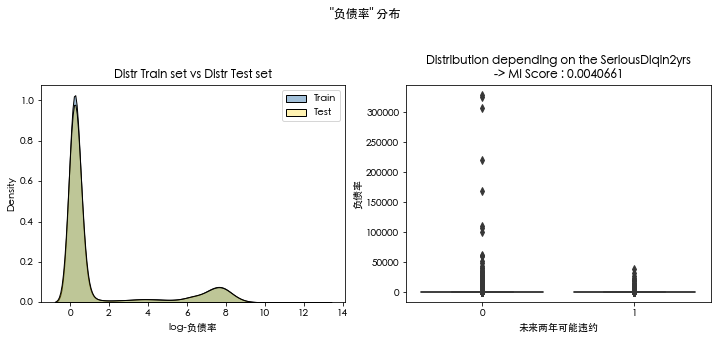

In [20]:
plot_distributions_continuous('负债率')

- 负债率正常来讲不会太高，主要集中在1附近（左图中取了对数，也就是0附近）
- 考虑根据左图将取对数后大于9的离群点进行处理

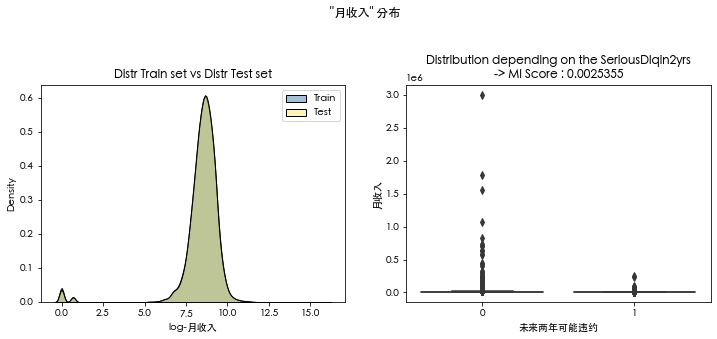

In [21]:
plot_distributions_continuous('月收入')

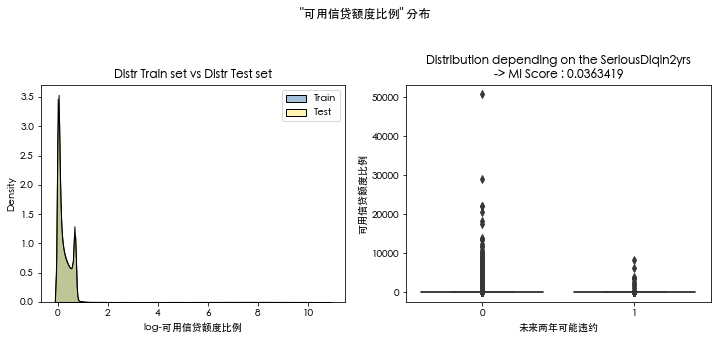

In [22]:
plot_distributions_continuous('可用信贷额度比例')

### 项目总结
- 项目进行相关性分析，可以快速获取特征之间的相关性打分，并进行初步的共线性判断
- 通过箱型图观察各字段异常情况，并数据分布的分析
- 进行多种可视化方式，快速了解数据的基本情况
